## Підключаємо усі потрібні бібліотеки

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Завантажуємо дані

In [39]:
df = pd.read_csv('pima-indians-diabetes.csv', names=['preg', 'plas', 'pres', 'skin', 
                                                     'test', 'mass', 'pedi', 'age', 'class'])
# drop NaNs
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [9]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Візуалізація

### Почнемо візуалізацію з побудови bar-графіку цільової змінної

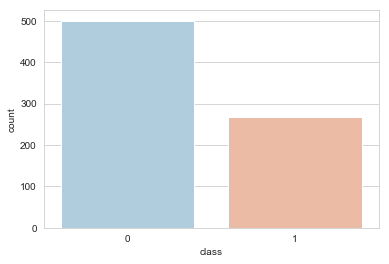

In [13]:
sb.set_style('whitegrid')
sb.countplot(x='class', data=df, palette='RdBu_r')

### Як бачимо, дані не збалансовані, тому будуть вжиті відповідні дії :)

In [49]:
a = df['preg'].apply(str)
a.head()

0    6
1    1
2    8
3    1
4    0
Name: preg, dtype: object

In [50]:
a = a.iloc[:5]

In [51]:
a.plot.pie()

TypeError: '<' not supported between instances of 'str' and 'int'

In [38]:
a = df.groupby('preg')


ValueError: setting an array element with a sequence.